In [2]:
from workflow_class import RecDMTA
import sys
sys.path.insert(0, '/users/yhb18174/Recreating_DMTA/scripts/models/')
from RF_class import RF_model
import pandas as pd


license file found: /users/yhb18174/oe_license.txt


In [1]:
full_data_fpath = "/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/"
full_data_fprefix = "PMG_rdkit_*.csv"
desc_fpath= "/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/"
desc_fprefix = "PMG_rdkit_desc_*.csv"
start_iter = 1
total_iters = 2
n_cmpds = 1
docking_dir = "/users/yhb18174/Recreating_DMTA/docking/PyMolGen/"
docking_file_dir = "/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/"
results_dir =  "/users/yhb18174/Recreating_DMTA/results/rdkit_desc/"
init_model_dir = '/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/'
run_name = 'test_3_mp'
chosen_mol_file = results_dir + run_name +'/chosen_mol.csv'
selection_method = 'mp'
id_prefix='PMG-',
docking_column="Affinity(kcal/mol)"
docking_score_files = 'PMG_docking_*.csv'

In [3]:
run = RecDMTA(full_data_fpath=full_data_fpath,
              full_data_fprefix=full_data_fprefix,
              desc_fpath=desc_fpath,
              desc_fprefix=desc_fprefix,
              start_iter=start_iter,
              total_iters=total_iters,   
              n_cmpds=n_cmpds,             
              docking_dir=docking_dir,
              docking_file_dir=docking_file_dir,
              results_dir=results_dir,
              init_model_dir=init_model_dir,
              chosen_mol_file=chosen_mol_file,
              selection_method=selection_method,
              docking_score_files=docking_score_files,
              run_name=run_name,
              docking_column=docking_column,
              max_confs=1)

Symbolic link created: 
/users/yhb18174/Recreating_DMTA/results/rdkit_desc/test_3_mp/it0 -> /users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0


Running with 40 CPUs

+===========Iteration: 1===========+

+-----------+----------+
|     ID    | batch_no |
+-----------+----------+
| PMG-78491 |    1     |
+-----------+----------+
+----------- Docking Batch 1 IDs -----------+

/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_1.csv
Status of IDs in batch:
ID
PMG-78491    NaN
Name: Affinity(kcal/mol), dtype: object
File PMG_docking_1.dock renamed back to PMG_docking_1
Random Seed:ompounds: PMG-78491
2096225635


To run on the GPU with dense mode set the force field to mmff94smod_NoEstat.


Waiting for the following jobs to complete: 11348455                            [-9.38]
[7.261]
File PMG_docking_1.dock renamed back to PMG_docking_1
All docking scores present
              Affinity(kcal/mol)
ID                              
CHEMBL3979343              -8.97
CHEMBL4089152              -7.76
CHEMBL4084046              -7.11
CHEMBL4069010              -7.28
CHEMBL4071717              -7.48
...                          ...
CHEMBL1507539              -8.03
CHEMBL188678               -9.65
CHEMBL278041               -8.93
CHEMBL4096140              -8.34
PMG-78491                  -9.38

[1054 rows x 1 columns]
Performing resample 43
Performing resample 11
Performing resample 21
Performing resample 7
Performing resample 29
Performing resample 9
Performing resample 41
Performing resample 49
Performing resample 39
Performing resample 35
Performing resample 37
Performing resample 1
Performing resample 31
Performing resample 23
Performing resample 13
Performing resample 5
Perfo

KeyboardInterrupt: 

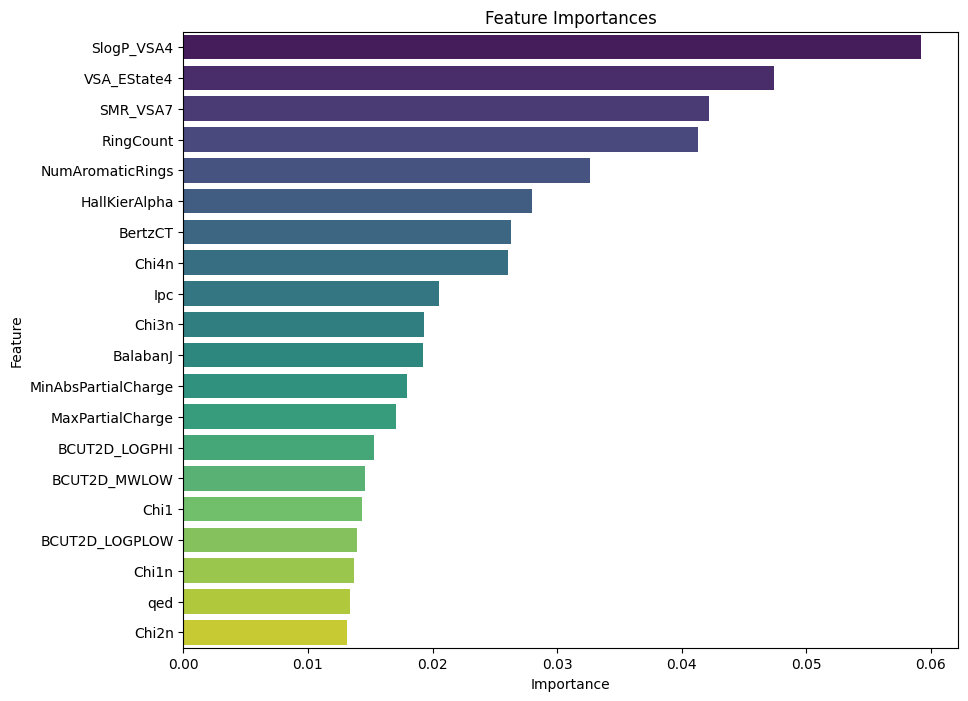

In [4]:
r = run.RunIterations(held_out_test_feats = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_desc.csv',
                      held_out_test_targs = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv')

In [ ]:
hp = run.hyper_params
feats = run.updated_feats
targs = run.updated_targs
path = "/users/yhb18174/"
save_final_model=False,
parallelise=True,
plot_feat_importance=False

model = RF_model()

a, b, c, d, e, f, g= model.Train_Regressor(search_type='grid',
                      hyper_params=hp,
                      features=feats,
                      targets=targs,
                      save_path=path,
                      save_final_model=False,
                      plot_feat_importance=False)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
c

{'Bias': 0.0035, 'SDEP': 0.2897, 'MSE': 0.0848, 'RMSE': 0.2902, 'r2': 0.8063}

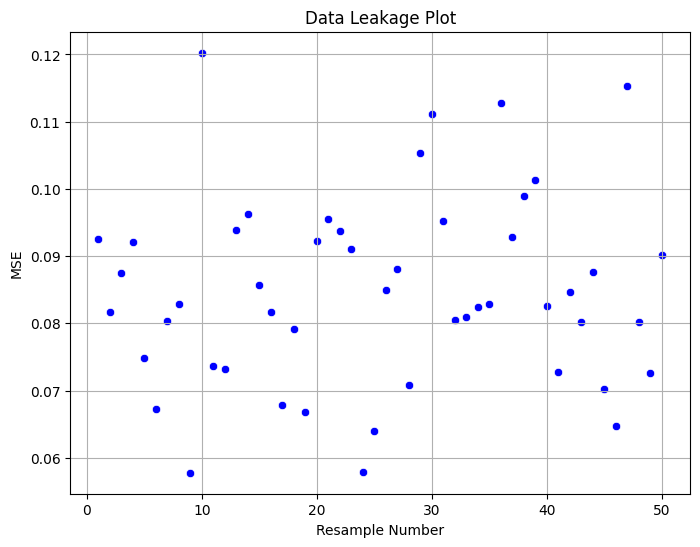

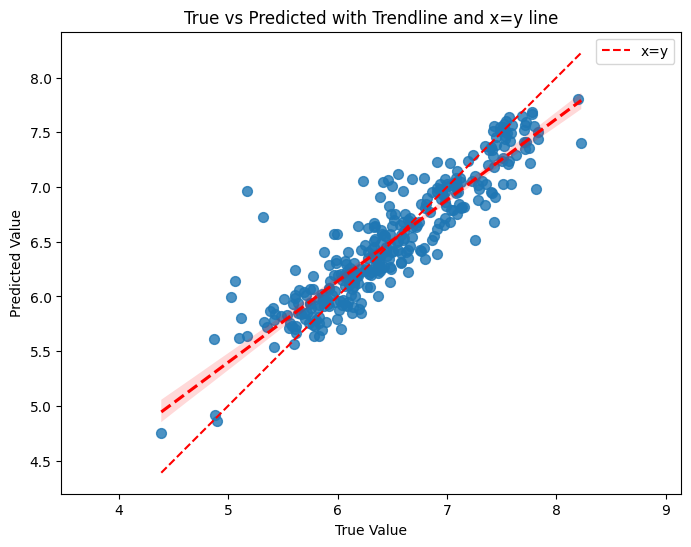

Mean Cross Validation Score:
-0.0951
Std Deviation of Cross Valisation Score:
0.0225


In [ ]:
model.AnalyseModel(plot_data_leakage = False
                    plot_resample_preds=True,
                    resample_n=2,
                    show_cv_scores=True)

In [ ]:
import numpy as np
df = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/ChEMBL_docking_scores.csv')
print(np.std(df['affinity_(kcal/mol)']))
print(np.max(df['affinity_(kcal/mol)']))
print(np.min(df['affinity_(kcal/mol)']))
print(np.mean(df['affinity_(kcal/mol)']))



1.0326834739466588
-3.91
-10.95
-7.922260208926875


In [ ]:
import numpy as np
df = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/dock/new_ChEMBL_docking_df.csv')
df = df[df['Affinity(kcal/mol)']!="False"]

print(np.std(df["Affinity(kcal/mol)"].astype(float)))
print(np.max(df["Affinity(kcal/mol)"].astype(float)))
print(np.min(df["Affinity(kcal/mol)"].astype(float)))
print(np.mean(df["Affinity(kcal/mol)"].astype(float)))


0.8782461441079636
-4.27
-11.05
-8.352336182336183


In [ ]:
import numpy as np
Ndf = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/dock/ChEMBL_docking_df.csv')
print(np.std(Ndf['CNN_affinity']))
print(np.max(Ndf['CNN_affinity']))
print(np.min(Ndf['CNN_affinity']))
print(np.mean(Ndf['CNN_affinity']))


0.6586249051654194
8.256
4.126
6.4451375711574945


In [9]:
aff = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/test_data/PMG_aff_docking_1.csv', index_col='ID')
aff['Affinity(kcal/mol)'] = 'NaN'
aff['Affinity(kcal/mol)'] = pd.to_numeric(aff["Affinity(kcal/mol)"], errors="coerce")
aff.to_csv('/users/yhb18174/Recreating_DMTA/datasets/test_data/PMG_aff_docking_1.csv', index_label='ID')
